# **Genetic Algorithm**

## **TASK 1**

### **Function Visualisation**

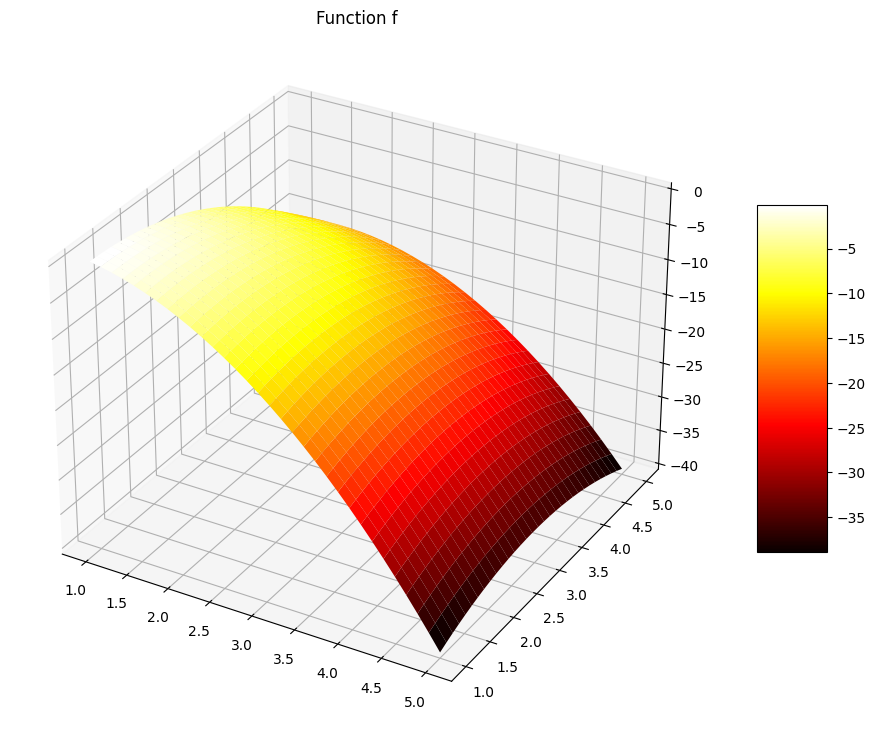

In [2]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt


x1 = np.outer(np.linspace(1, 5, 32), np.ones(32))
x2 = x1.copy().T
f = x1 + x2 - 2*(x1**2) - x2**2 + x1*x2


fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
my_cmap = plt.get_cmap('hot')
surf = ax.plot_surface(x1, x2, f, cmap = my_cmap,
                       edgecolor ='none')
fig.colorbar(surf, ax = ax,
             shrink = 0.5, aspect = 5)
ax.set_title('Function f')
plt.show()


### **Full Code With Epochs**

In [ ]:
import random

def decoding(my_list):
    result = sum(j * (2 ** (len(my_list) - i - 1)) for i, j in enumerate(my_list))
    return result

def parents_selection(my_list):
  num_parents = 2
  best_parents = []
  random.seed(42)
  while len(best_parents) < 10:
    random_parents = random.sample(f_results, 2)
    best = max(random_parents)
    best_parents.append(best)
  return best_parents

def crossover(binary_strings):
  # Single-point crossover for adjacent parents strings
  offspring = []
  random.seed(42)
  for i in range(0, len(binary_strings), 2):
    parent1 = binary_strings[i]
    parent2 = binary_strings[i + 1]

    if random.random() < pc:
      crossover_point = random.randint(1, len(parent1) - 1)

      child1 = parent1[:crossover_point] + parent2[crossover_point:]
      child2 = parent2[:crossover_point] + parent1[crossover_point:]

      offspring.extend([child1, child2])
    else:
      offspring.extend([parent1, parent2])

  return offspring

def mutation(binary_strings):
  sublist_length = 8
  new_structure = []

  for row in binary_strings:
    sublists = [row[i:i + sublist_length] for i in range(0, len(row), sublist_length)]
    new_structure.append(sublists)

  mutated_list = []

  for sublist in new_structure:
    mutated_sublist = []
    for inner_list in sublist:
        mutated_inner_list = []
        for bit in inner_list:
            if random.random() < pm:
                mutated_inner_list.append(1 - bit)  # Flip the bit with the given probability
            else:
                mutated_inner_list.append(bit)
        mutated_sublist.append(mutated_inner_list)
    mutated_list.append(mutated_sublist)

  next_generation_mutated = mutated_list

  return next_generation_mutated

#Initialisation
population_size = 10
var_bits = 8 # presicion; number of bits for each variable
pc = 0.8 # probability of crossover
pm = 0.06 # probability of mutation
iterations = 50

random.seed(42)
initial_population = [[[random.randint(0, 1)
 for _ in range(var_bits)] for _ in range(2)] for _ in range(population_size)]

print('Initial population:')
for j in range(len(initial_population)):
    print(initial_population[j])

next_generation_mutated = initial_population
#for i in range(len(next_generation_mutated)):
#  print(next_generation_mutated[i])


# THE ITERATION CYCLE
for epoch in range(50):
  print('Epoch ', epoch, ' has started')
  # Ranges of x1, x2 values
  xL = 1 # same as yL = 1
  xU = 5 # same as yU = 5

  decoded = []
  for outer_list in next_generation_mutated:
    for inner_list in outer_list:
        if len(inner_list) == 8:
            result = decoding(inner_list)
            x_result = round(xL + ((xU - xL)/(2**var_bits - 1))*result,2)
            decoded.append(x_result)
  decoded = [decoded[i:i+2] for i in range(0, len(decoded), 2)]

  f_results = []
  for i in range(len(decoded)):
    x1 = decoded[i][0]
    x2 = decoded[i][1]
    f = round(x1 + x2 - 2*(x1**2) - x2**2 + x1*x2, 3)
    f_results.append(f)

  f_parents_selected = parents_selection(f_results)

  # Create list4 with indexes based on values from list1 in list2
  indexes = [f_results.index(value) for value in f_parents_selected]
  parents = [next_generation_mutated[i] for i in indexes]
  flattened_list = []
  # Iterate through the original list and extend the flattened list
  for sublist in parents:
    flattened_sublist = []
    for inner_list in sublist:
        flattened_sublist.extend(inner_list)
    flattened_list.append(flattened_sublist)
  parents = flattened_list

  next_generation = crossover(parents)
  next_generation_mutated = mutation(next_generation)
  for j in range(len(next_generation_mutated)):
    print(next_generation_mutated[j])
  print('Epoch ', epoch, ' has been completed')
print('---------------------------------------------------------------------')
print("FINAL RESULT:")
next_generation_mutated

Initial population:
[[0, 0, 1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0]]
[[1, 0, 1, 1, 0, 0, 1, 1], [1, 0, 0, 1, 0, 0, 1, 0]]
[[1, 1, 1, 0, 1, 0, 1, 0], [1, 1, 0, 0, 0, 0, 1, 0]]
[[0, 0, 1, 1, 1, 1, 0, 1], [1, 0, 1, 0, 0, 0, 0, 1]]
[[1, 1, 0, 1, 0, 0, 0, 1], [1, 1, 0, 0, 1, 0, 1, 1]]
[[1, 0, 1, 0, 0, 1, 1, 1], [1, 0, 0, 1, 0, 0, 0, 0]]
[[0, 1, 0, 1, 1, 1, 1, 0], [0, 1, 1, 0, 1, 1, 0, 1]]
[[0, 1, 0, 0, 1, 0, 0, 1], [0, 0, 1, 1, 0, 0, 1, 1]]
[[0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 0, 1, 1, 0, 0, 1]]
[[1, 1, 1, 1, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0]]
Epoch  0  has started
[[0, 0, 0, 1, 1, 0, 0, 1], [1, 0, 1, 0, 1, 0, 0, 1]]
[[0, 0, 1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0]]
[[0, 0, 0, 1, 0, 1, 0, 0], [0, 1, 0, 1, 1, 0, 0, 1]]
[[0, 0, 0, 0, 1, 1, 0, 1], [1, 0, 1, 0, 1, 0, 0, 1]]
[[0, 1, 0, 1, 1, 1, 1, 0], [0, 1, 1, 0, 0, 0, 0, 0]]
[[0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 1, 0, 0, 1]]
[[0, 0, 1, 1, 1, 1, 0, 1], [1, 0, 1, 0, 1, 0, 0, 1]]
[[0, 0, 0, 0, 0, 0, 0, 1], [0, 1, 0, 1, 1, 0, 0, 1]]
[[0,

[[[0, 0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 1, 0, 0, 0, 1]],
 [[0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 1, 1, 0, 0, 1]],
 [[0, 0, 1, 0, 0, 0, 0, 0], [0, 1, 0, 1, 1, 0, 0, 1]],
 [[0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 1, 0, 0, 0, 1]],
 [[0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 1, 0, 0, 0, 1]],
 [[0, 0, 1, 0, 0, 0, 0, 0], [0, 1, 0, 1, 0, 1, 0, 1]],
 [[0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 1, 1, 0, 0, 1]],
 [[0, 0, 0, 0, 0, 1, 0, 1], [0, 1, 0, 1, 0, 0, 0, 1]],
 [[0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 1, 0, 0, 0, 1]],
 [[0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 1, 1, 0, 0, 1]]]

In [ ]:
# Test for difference  in final list and previous ones

list1 = [
[[0, 0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 1, 1, 0, 0, 1]],
[[0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 1, 1, 0, 0, 1]],
[[0, 0, 1, 0, 0, 0, 0, 0], [0, 1, 0, 1, 0, 0, 0, 1]],
[[0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 1, 1, 0, 0, 1]],
[[0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 1, 1, 0, 0, 1]],
[[0, 0, 1, 0, 0, 0, 0, 0], [0, 1, 0, 1, 1, 1, 0, 1]],
[[0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 1, 0, 0, 0, 1]],
[[0, 0, 0, 0, 0, 1, 0, 1], [0, 1, 0, 1, 1, 0, 0, 1]],
[[0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 1, 1, 0, 0, 1]],
[[0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 1, 0, 0, 0, 1]]]
list2 = [
[[0, 0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 1, 0, 0, 0, 1]],
 [[0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 1, 1, 0, 0, 1]],
 [[0, 0, 1, 0, 0, 0, 0, 0], [0, 1, 0, 1, 1, 0, 0, 1]],
 [[0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 1, 0, 0, 0, 1]],
 [[0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 1, 0, 0, 0, 1]],
 [[0, 0, 1, 0, 0, 0, 0, 0], [0, 1, 0, 1, 0, 1, 0, 1]],
 [[0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 1, 1, 0, 0, 1]],
 [[0, 0, 0, 0, 0, 1, 0, 1], [0, 1, 0, 1, 0, 0, 0, 1]],
 [[0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 1, 0, 0, 0, 1]],
 [[0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 1, 1, 0, 0, 1]]]
if list1 == list2:
    print("The two lists are the same.")
else:
    print("The two lists are different.")

The two lists are different.


# **Real-coded GA**

**Problem description**

In [ ]:
import math

#minimize x1 + x2
# -5 <= x1 <= 10
# 0 <= x2 <= 15
x1 = 0
x2 = 0

 (x2 - (5.1*x1**2)/(4*math.pi**2) + (5*x1)/math.pi - 6)**2 + (10 - 10/(8*math.pi))*math.cos(x1) + 9 <= 0
x2 + (x - 12)/1.2 <= 0

0.0

### **Real-coded SBX-crossover GA**

#### **Real-Coded GA By Steps**

In [ ]:
import random
import math

# Objective function
def objective_function(x1, x2):
    return x1 + x2

# Constraints
def constraint1(x1):
    return -5 <= x1 <= 10

def constraint2(x2):
    return 0 <= x2 <= 15

In [ ]:
# GA parameters
population_size = 10
iterations = 50
pm = 0.1  # Probability of mutation
pc = 0.8  # Probability of crossover

# Additional parameters for SBX crossover
eta = 10.0  # Distribution index
lower_bound = -5  # Lower bound for variables
upper_bound = 15  # Upper bound for variables

# Initialisation of the initial population
random.seed(42)
population = [(random.uniform(-5, 10), random.uniform(0, 15)) for _ in range(population_size)]
population

[(4.591401976868257, 0.37516132834000404),
 (-0.8745602244632114, 3.348161072232341),
 (6.047068212460186, 10.150492311343669),
 (8.382693515572681, 1.3040824894412424),
 (1.3288272952790567, 0.44695829157105516),
 (-1.7204303779459496, 7.580329321550436),
 (-4.601960454742046, 2.982564760299727),
 (4.748266566692848, 8.17412220904825),
 (-1.6933906693895495, 8.838985258138631),
 (7.141456850167399, 0.09748139517091525)]

In [ ]:
def sbx_crossover(parent1, parent2, eta=10.0):
    child1 = [0] * len(parent1)
    child2 = [0] * len(parent2)

    for i in range(len(parent1)):
        if random.random() < 0.5:
            if abs(parent1[i] - parent2[i]) > 1e-6:
                if parent1[i] < parent2[i]:
                    p1, p2 = parent1[i], parent2[i]
                else:
                    p1, p2 = parent2[i], parent1[i]
                rand = random.random()
                beta = 1.0 + (2.0 * (p1 - lower_bound) / (p2 - p1))
                alpha = 2.0 - beta**(-eta + 1.0)
                if rand <= 1.0 / alpha:
                    beta_q = (rand * alpha) ** (1.0 / (eta + 1.0))
                else:
                    beta_q = (1.0 / (2.0 - rand * alpha)) ** (1.0 / (eta + 1.0))
                c1 = 0.5 * ((p1 + p2) - beta_q * (p2 - p1))
                beta = 1.0 + (2.0 * (upper_bound - p2) / (p2 - p1))
                alpha = 2.0 - beta**(-eta + 1.0)
                if rand <= 1.0 / alpha:
                    beta_q = (rand * alpha) ** (1.0 / (eta + 1.0))
                else:
                    beta_q = (1.0 / (2.0 - rand * alpha)) ** (1.0 / (eta + 1.0))
                c2 = 0.5 * ((p1 + p2) + beta_q * (p2 - p1))
                child1[i] = min(max(c1, lower_bound), upper_bound)
                child2[i] = min(max(c2, lower_bound), upper_bound)
            else:
                child1[i] = parent1[i]
                child2[i] = parent2[i]
        else:
            child1[i] = parent1[i]
            child2[i] = parent2[i]

    return child1, child2

In [ ]:
def real_valued_mutation(individual, pm, mutation_range):
    for i in range(len(individual)):
        if random.random() < pm:
            individual[i] += random.uniform(-mutation_range, mutation_range)
    return individual

In [ ]:
# Main loop
for generation in range(iterations):
    # Evaluate the fitness of each individual
    fitness_values = [objective_function(x1, x2) for x1, x2 in population]

    # Select the best individuals
    num_parents = int(population_size * 0.2)
    parents = [population[i] for i in sorted(range(population_size), key=lambda i: fitness_values[i])[:num_parents]]

    # Create a new population through SBX crossover and mutation
    new_population = parents.copy()

    while len(new_population) < population_size:
        parent1, parent2 = random.choices(parents, k=2)
        child1, child2 = sbx_crossover(parent1, parent2)
        child1 = real_valued_mutation(child1, pm, mutation_range=0.5)
        child2 = real_valued_mutation(child2, pm, mutation_range=0.5)
        new_population.append(tuple(child1))
        new_population.append(tuple(child2))

    population = new_population

# Ensure that the final population satisfies constraints
population = [tuple(ind) for ind in population]
population

[(-5.0, -5.002440587934311),
 (-5.0, -5.002440587934311),
 (-5.0, -5.002440587934311),
 (-5.0, -5.002440587934311),
 (-5.0, -5.002440587934311),
 (-5.0, -5.002440587934311),
 (-5.0, -5.002440587934311),
 (-5.0, -5.002440587934311),
 (-5.0, -5.002440587934311),
 (-5.0, -4.625896450334835)]

In [ ]:
# Evaluate the fitness of the final population
fitness_values = [objective_function(x1, x2) for x1, x2 in population]
fitness_values

[-10.002440587934311,
 -10.002440587934311,
 -10.002440587934311,
 -10.002440587934311,
 -10.002440587934311,
 -10.002440587934311,
 -10.002440587934311,
 -10.002440587934311,
 -10.002440587934311,
 -9.625896450334835]

In [ ]:
# Find the best individual
best_individual = population[fitness_values.index(min(fitness_values))]

# Print the results
best_x1, best_x2 = best_individual
best_objective_value = objective_function(best_x1, best_x2)
print("Best Solution:")
print(f"x1: {best_x1}")
print(f"x2: {best_x2}")
print(f"Objective Value: {best_objective_value}")

Best Solution:
x1: -5.0
x2: -5.002440587934311
Objective Value: -10.002440587934311


**Real-Coded SBX-crossover GA Full Code**

In [ ]:
import random
import math

# Objective function
def objective_function(x1, x2):
    return x1 + x2

# Constraints
def constraint1(x1):
    return -5 <= x1 <= 10

def constraint2(x2):
    return 0 <= x2 <= 15

# GA parameters
population_size = 10
iterations = 50
pm = 0.1  # Probability of mutation
pc = 0.8  # Probability of crossover

# Additional parameters for SBX crossover
eta = 10.0  # Distribution index
lower_bound = -5  # Lower bound for variables
upper_bound = 15  # Upper bound for variables

# Initialisation of the initial population
random.seed(42)
population = [(random.uniform(-5, 10), random.uniform(0, 15)) for _ in range(population_size)]

def sbx_crossover(parent1, parent2):
    child1 = []
    child2 = []

    for i in range(2):
        beta = random.uniform(-0.5, 1.5)  # Random value in the range (-0.5, 1.5)
        c1 = 0.5 * ((1 + beta) * parent1[i] + (1 - beta) * parent2[i])
        c2 = 0.5 * ((1 - beta) * parent1[i] + (1 + beta) * parent2[i])
        child1.append(c1)
        child2.append(c2)

    return child1, child2

def real_valued_mutation(individual, mutation_rate, mutation_range):
    for i in range(2):
        if random.random() < mutation_rate:
            individual[i] += random.uniform(-mutation_range, mutation_range)
            individual[i] = max(min(individual[i], 15), -5)  # Ensure within bounds

    return individual

# Main loop
for generation in range(iterations):
    # Evaluate the fitness of each individual
    fitness_values = [objective_function(x1, x2) for x1, x2 in population]

    # Select the best individuals
    num_parents = int(population_size * 0.2)
    parents = [population[i] for i in sorted(range(population_size), key=lambda i: fitness_values[i])[:num_parents]]

    # Create a new population through SBX crossover and mutation
    new_population = parents.copy()

    while len(new_population) < population_size:
        parent1, parent2 = random.choices(parents, k=2)
        child1, child2 = sbx_crossover(parent1, parent2)
        child1 = real_valued_mutation(child1, pm, mutation_range=0.5)
        child2 = real_valued_mutation(child2, pm, mutation_range=0.5)
        new_population.append(tuple(child1))
        new_population.append(tuple(child2))

    population = new_population
    print(population)

# Ensure that the final population satisfies constraints
population = [tuple(ind) for ind in population]
fitness_values = [objective_function(x1, x2) for x1, x2 in population]
best_individual = population[fitness_values.index(min(fitness_values))]

best_x1, best_x2 = best_individual
best_objective_value = objective_function(best_x1, best_x2)
print("Best Solution:")
print(f"x1: {best_x1}")
print(f"x2: {best_x2}")
print(f"Objective Value: {best_objective_value}")


[(-4.601960454742046, 2.982564760299727), (1.3288272952790567, 0.44695829157105516), (1.3288272952790567, 0.44695829157105516), (0.9255436721125208, 0.44695829157105516), (1.3288272952790567, 0.44695829157105516), (1.3288272952790567, 0.44695829157105516), (1.0567255709306036, 0.44695829157105516), (1.061618181640087, 0.44695829157105516), (-2.317611860075501, 2.0194931635750266), (-0.9555212993874881, 1.4100298882957558)]
[(-4.601960454742046, 2.982564760299727), (1.3288272952790567, 0.44695829157105516), (1.3288272952790567, 0.44695829157105516), (0.9255436721125208, 0.44695829157105516), (1.3288272952790567, 0.44695829157105516), (1.3288272952790567, 0.44695829157105516), (1.0567255709306036, 0.44695829157105516), (1.061618181640087, 0.44695829157105516), (-2.317611860075501, 2.0194931635750266), (-0.9555212993874881, 1.4100298882957558)]
[(-4.601960454742046, 2.982564760299727), (1.3288272952790567, 0.44695829157105516), (1.3288272952790567, 0.44695829157105516), (0.925543672112520

### **Real-coded BLX-alpha crossover GA**

####**Real-coded BLX-alpha crossover GA Full Code**

In [ ]:
import random
import math

# Objective function
def objective_function(x1, x2):
    return x1 + x2

# Constraints
def constraint1(x1):
    return -5 <= x1 <= 10

def constraint2(x2):
    return 0 <= x2 <= 15

# GA parameters
population_size = 10
iterations = 50
pm = 0.1  # Probability of mutation
pc = 0.8  # Probability of crossover

# Initialisation of the initial population
random.seed(42)
population = [(random.uniform(-5, 10), random.uniform(0, 15)) for _ in range(population_size)]

# Define the BLX-alpha crossover operator
def blx_alpha_crossover(parent1, parent2, alpha=0.5):
    child = []

    for i in range(2):
        min_val = min(parent1[i], parent2[i])
        max_val = max(parent1[i], parent2[i])
        range_val = max_val - min_val
        width = range_val + alpha * range_val
        c = min_val - alpha * range_val + random.uniform(0, 1) * width
        child.append(min(max(c, -5), 15))  # Ensure within bounds

    return child

def real_valued_mutation(individual, mutation_rate, mutation_range):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] += random.uniform(-mutation_range, mutation_range)
    return individual

# Main loop
for generation in range(iterations):
    # Evaluate the fitness of each individual
    fitness_values = [objective_function(x1, x2) for x1, x2 in population]

    # Select the best individuals
    num_parents = int(population_size * 0.2)
    parents = [population[i] for i in sorted(range(population_size), key=lambda i: fitness_values[i])[:num_parents]]

    # Create a new population through BLX-alpha crossover and mutation
    new_population = parents.copy()

    while len(new_population) < population_size:
        parent1, parent2 = random.choices(parents, k=2)
        child = blx_alpha_crossover(parent1, parent2)
        child = tuple(child)  # Convert child back to a tuple
        for i in range(2):
            if random.random() < pm:
                child = list(child)  # Convert child to a list for mutation
                child = real_valued_mutation(child, pm, mutation_range=0.5)
                child = tuple(child)  # Convert child back to a tuple after mutation
        new_population.append(child)

    population = new_population

# Ensure that the final population satisfies constraints
population = [tuple(ind) for ind in population]

# Evaluate the fitness of the final population
fitness_values = [objective_function(x1, x2) for x1, x2 in population]

# Find the best individual
best_individual = population[fitness_values.index(min(fitness_values))]

# Print the results
best_x1, best_x2 = best_individual
best_objective_value = objective_function(best_x1, best_x2)
print("Best Solution:")
print(f"x1: {best_x1}")
print(f"x2: {best_x2}")
print(f"Objective Value: {best_objective_value}")

Best Solution:
x1: -5.0
x2: -1.1271785029769135
Objective Value: -6.127178502976913


#**Constraints Handling**

##**Death Penalty**

In [ ]:
import random
import math

# Objective function
def objective_function(x1, x2):
    return x1 + x2

# Constraints
def constraint1(x1):
    return -5 <= x1 <= 10

def constraint2(x2):
    return 0 <= x2 <= 15

# GA parameters
population_size = 10
iterations = 50
pm = 0.1  # Probability of mutation
pc = 0.8  # Probability of crossover

# Additional parameters for SBX crossover
eta = 10.0  # Distribution index
lower_bound = -5  # Lower bound for variables
upper_bound = 15  # Upper bound for variables

# Initialisation of the initial population
random.seed(42)
population = [(random.uniform(-5, 10), random.uniform(0, 15)) for _ in range(population_size)]

def sbx_crossover(parent1, parent2):
    child1 = []
    child2 = []

    for i in range(2):
        beta = random.uniform(-0.5, 1.5)  # Random value in the range (-0.5, 1.5)
        c1 = 0.5 * ((1 + beta) * parent1[i] + (1 - beta) * parent2[i])
        c2 = 0.5 * ((1 - beta) * parent1[i] + (1 + beta) * parent2[i])
        child1.append(c1)
        child2.append(c2)

    return child1, child2

def real_valued_mutation(individual, mutation_rate, mutation_range):
    for i in range(2):
        if random.random() < mutation_rate:
            individual[i] += random.uniform(-mutation_range, mutation_range)
            individual[i] = max(min(individual[i], 15), -5)  # Ensure within bounds

    return individual

# Main loop
for generation in range(iterations):
    # Evaluate the fitness of each individual
    fitness_values = [objective_function(x1, x2) if constraint1(x1) and constraint2(x2) else 0 for x1, x2 in population]

    # Select the best individuals
    num_parents = int(population_size * 0.2)
    parents = [population[i] for i in sorted(range(population_size), key=lambda i: fitness_values[i], reverse=True)[:num_parents]]

    # Create a new population through SBX crossover and mutation
    new_population = parents.copy()

    while len(new_population) < population_size:
        parent1, parent2 = random.choices(parents, k=2)
        child1, child2 = sbx_crossover(parent1, parent2)
        child1 = real_valued_mutation(child1, pm, mutation_range=0.5)
        child2 = real_valued_mutation(child2, pm, mutation_range=0.5)
        new_population.extend([tuple(child1), tuple(child2)])

    population = new_population

# Ensure that the final population satisfies constraints by death penalty
population = [tuple(ind) for ind in population]
fitness_values = [objective_function(x1, x2) if constraint1(x1) and constraint2(x2) else 0 for x1, x2 in population]

# Find the best individual considering constraint violations
best_fitness = max(fitness_values, default=0)
best_individual = population[fitness_values.index(best_fitness)]

best_x1, best_x2 = best_individual
best_objective_value = objective_function(best_x1, best_x2)
print("Best Solution:")
print(f"x1: {best_x1}")
print(f"x2: {best_x2}")
print(f"Objective Value: {best_objective_value}")

Best Solution:
x1: 8.227103130767574
x2: 14.087631244444989
Objective Value: 22.314734375212563


## **Kuri's Static Penalty**

In [ ]:
import random
import math

# Objective function
def objective_function(x1, x2):
    return x1 + x2

# Constraints
def constraint1(x1):
    return -5 <= x1 <= 10

def constraint2(x2):
    return 0 <= x2 <= 15

# GA parameters
population_size = 10
iterations = 50
pm = 0.1  # Probability of mutation
pc = 0.8  # Probability of crossover

# Additional parameters for SBX crossover
eta = 10.0  # Distribution index
lower_bound = -5  # Lower bound for variables
upper_bound = 15  # Upper bound for variables

# Static Penalty Parameters
K = 1e6  # A large constant
num_constraints = 2  # Number of constraints

# Initialisation of the initial population
random.seed(42)
population = [(random.uniform(-5, 10), random.uniform(0, 15)) for _ in range(population_size)]

def sbx_crossover(parent1, parent2):
    child1 = []
    child2 = []

    for i in range(2):
        beta = random.uniform(-0.5, 1.5)  # Random value in the range (-0.5, 1.5)
        c1 = 0.5 * ((1 + beta) * parent1[i] + (1 - beta) * parent2[i])
        c2 = 0.5 * ((1 - beta) * parent1[i] + (1 + beta) * parent2[i])
        child1.append(c1)
        child2.append(c2)

    return child1, child2

def real_valued_mutation(individual, mutation_rate, mutation_range):
    for i in range(2):
        if random.random() < mutation_rate:
            individual[i] += random.uniform(-mutation_range, mutation_range)
            individual[i] = max(min(individual[i], 15), -5)  # Ensure within bounds

    return individual

def count_satisfied_constraints(individual):
    satisfied_constraints = 0
    if constraint1(individual[0]):
        satisfied_constraints += 1
    if constraint2(individual[1]):
        satisfied_constraints += 1
    return satisfied_constraints

# Main loop
for generation in range(iterations):
    # Evaluate the fitness of each individual
    fitness_values = [objective_function(x1, x2) if constraint1(x1) and constraint2(x2) else
                      K - (K / num_constraints) * (num_constraints - count_satisfied_constraints((x1, x2)))
                      for x1, x2 in population]

    # Select the best individuals
    num_parents = int(population_size * 0.2)
    parents = [population[i] for i in sorted(range(population_size), key=lambda i: fitness_values[i], reverse=True)[:num_parents]]

    # Create a new population through SBX crossover and mutation
    new_population = parents.copy()

    while len(new_population) < population_size:
        parent1, parent2 = random.choices(parents, k=2)
        child1, child2 = sbx_crossover(parent1, parent2)
        child1 = real_valued_mutation(child1, pm, mutation_range=0.5)
        child2 = real_valued_mutation(child2, pm, mutation_range=0.5)
        new_population.extend([tuple(child1), tuple(child2)])

    population = new_population

# Ensure that the final population satisfies constraints with Kuri's static penalty
population = [tuple(ind) for ind in population]
fitness_values = [objective_function(x1, x2) if constraint1(x1) and constraint2(x2) else
                  K - (K / num_constraints) * (num_constraints - count_satisfied_constraints((x1, x2)))
                  for x1, x2 in population]

# Find the best individual considering constraint violations
best_fitness = min(fitness_values)
best_individual = population[fitness_values.index(best_fitness)]

best_x1, best_x2 = best_individual
best_objective_value = objective_function(best_x1, best_x2)
print("Best Solution:")
print(f"x1: {best_x1}")
print(f"x2: {best_x2}")
print(f"Objective Value: {best_objective_value}")

Best Solution:
x1: 8.22284760164437
x2: 14.082525447970164
Objective Value: 22.305373049614534


## **Joines and Houck's Dynamic Penalty**

In [ ]:
import random
import math

# Objective function
def objective_function(x1, x2):
    return x1 + x2

# Constraints
def constraint1(x1):
    return -5 <= x1 <= 10

def constraint2(x2):
    return 0 <= x2 <= 15

# GA parameters
population_size = 10
iterations = 50
pm = 0.1  # Probability of mutation
pc = 0.8  # Probability of crossover

# Additional parameters for SBX crossover
eta = 10.0  # Distribution index
lower_bound = -5  # Lower bound for variables
upper_bound = 15  # Upper bound for variables

# Initialisation of the initial population
random.seed(42)
population = [(random.uniform(-5, 10), random.uniform(0, 15)) for _ in range(population_size)]

# Static Penalty Parameters
num_constraints = 2  # Number of constraints

def sbx_crossover(parent1, parent2):
    child1 = []
    child2 = []

    for i in range(2):
        beta = random.uniform(-0.5, 1.5)  # Random value in the range (-0.5, 1.5)
        c1 = 0.5 * ((1 + beta) * parent1[i] + (1 - beta) * parent2[i])
        c2 = 0.5 * ((1 - beta) * parent1[i] + (1 + beta) * parent2[i])
        child1.append(c1)
        child2.append(c2)

    return child1, child2

def real_valued_mutation(individual, mutation_rate, mutation_range):
    for i in range(2):
        if random.random() < mutation_rate:
            individual[i] += random.uniform(-mutation_range, mutation_range)
            individual[i] = max(min(individual[i], 15), -5)  # Ensure within bounds

    return individual

# Joines and Houck penalty function

# Joines and Houck user-defined constants
C = 0.5
a = 1
B = 1

def joines_houck_penalty(individual, C, a, B):
    violation_sum = 0
    for i in range(2):
        if not (constraint1(individual[0]) and constraint2(individual[1])):
            violation = abs(max(0, constraint1(individual[0]))) + abs(max(0, constraint2(individual[1])))
            violation_sum += violation
    penalty = C * ((violation_sum + B) ** a)

    return penalty

# Main loop
for generation in range(iterations):
    # Evaluate the fitness of each individual
    fitness_values = [
        objective_function(x1, x2) + joines_houck_penalty((x1, x2), C, a, B)
        for x1, x2 in population
    ]

    # Select the best individuals
    num_parents = int(population_size * 0.2)
    parents = [population[i] for i in sorted(range(population_size), key=lambda i: fitness_values[i], reverse=True)[:num_parents]]

    # Create a new population through SBX crossover and mutation
    new_population = parents.copy()

    while len(new_population) < population_size:
        parent1, parent2 = random.choices(parents, k=2)
        child1, child2 = sbx_crossover(parent1, parent2)
        child1 = real_valued_mutation(child1, pm, mutation_range=0.5)
        child2 = real_valued_mutation(child2, pm, mutation_range=0.5)
        new_population.extend([tuple(child1), tuple(child2)])

    population = new_population

# Ensure that the final population satisfies constraints
population = [tuple(ind) for ind in population]
fitness_values = [
    objective_function(x1, x2) + joines_houck_penalty((x1, x2), C, a, B)
    for x1, x2 in population
]

# Find the best individual considering constraint violations
best_fitness = min(fitness_values)
best_individual = population[fitness_values.index(best_fitness)]

best_x1, best_x2 = best_individual
best_objective_value = objective_function(best_x1, best_x2)
print("Best Solution:")
print(f"x1: {best_x1}")
print(f"x2: {best_x2}")
print(f"Objective Value: {best_objective_value}")

Best Solution:
x1: 8.22284760164437
x2: 14.082525447970164
Objective Value: 22.305373049614534
